# **Car price prediction**

In [22]:
# STEP 0: import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#apis
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
#modules
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#training models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge


#normal lib
from statistics import mean
import joblib
import seaborn as sns

# **STEP 1. LOOK AT THE BIG PICTURE DEON**
# tell briefly about car prices and what features have been used

In [2]:
#STEP 2: GET THE DATA 
raw_data = pd.read_csv(r'car_price_prediction.csv')

In [3]:
# STEP 3: EDA 
# 3.1. briefly analyse the dataset with info, head and describe()
print("Dataset info:")
print(raw_data.info())

print("Data briefing: ")
print(raw_data.head())

print("Data describe: ")
print(raw_data.describe())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 no

In [4]:
# 3.1.1. Missing values:
print("Missing values: ")
print(raw_data.isna().sum())

Missing values: 
ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


In [5]:
#cleaning the mileague
raw_data['Mileage'] = raw_data['Mileage'].str.extract('(\d+)').astype(int)

# extracting the enginer volume
raw_data['Turbo'] = raw_data['Engine volume'].apply(lambda x: 1 if 'Turbo' in x else 0)
raw_data['Engine volume'] = raw_data['Engine volume'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

# fix levy
raw_data['Levy'] = raw_data['Levy'].replace('-', '0').astype(int)


In [6]:
cols=raw_data.columns
num_cols = raw_data._get_numeric_data()
num_cols= list(num_cols.columns)
cat_cols = list(set(cols) - set(num_cols))
cat_cols.sort()

print(f"Numerical features: {num_cols}")
print(f"Categorical features: {cat_cols}")
print(raw_data['Mileage'].value_counts()) 


Numerical features: ['ID', 'Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Turbo']
Categorical features: ['Category', 'Color', 'Doors', 'Drive wheels', 'Fuel type', 'Gear box type', 'Leather interior', 'Manufacturer', 'Model', 'Wheel']
Mileage
0         721
200000    183
150000    161
160000    120
100000    119
         ... 
63083       1
28750       1
25077       1
77452       1
186923      1
Name: count, Length: 7687, dtype: int64


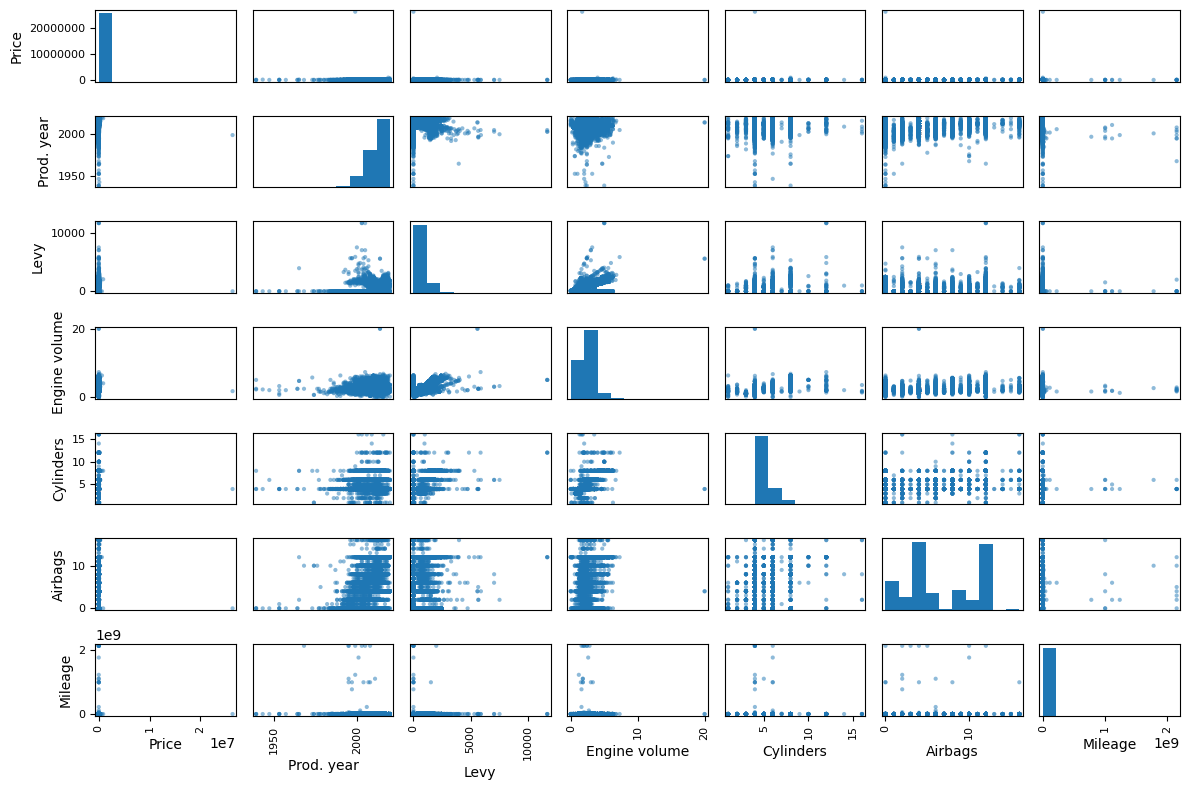

In [7]:
# 3.x. scatter matrix of numerical data
from pandas.plotting import scatter_matrix
def scatter(raw_data):
	attributes = ['Price', 'Prod. year', 'Levy', 'Engine volume', 'Cylinders', 'Airbags', 'Mileage'	]
	scatter_matrix(raw_data[attributes], figsize=(12, 8))
	plt.tight_layout()
	plt.show()
scatter(raw_data)

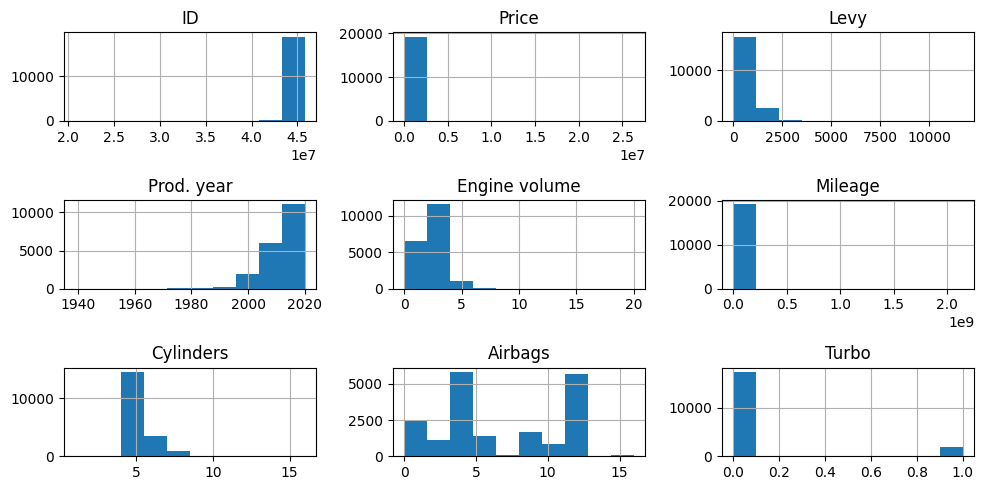

In [8]:
raw_data.hist(figsize=(10,5)) #bins: no. of intervals
plt.tight_layout()
# plt.rcParams['xtick.labelsize'] = 10
# plt.rcParams['ytick.labelsize'] = 10


In [9]:
corr_matrix = raw_data.corr(numeric_only=True)
print(corr_matrix)

                     ID     Price      Levy  Prod. year  Engine volume  \
ID             1.000000 -0.000844  0.102614    0.071352      -0.012232   
Price         -0.000844  1.000000 -0.003701    0.012982       0.008753   
Levy           0.102614 -0.003701  1.000000    0.364712       0.377438   
Prod. year     0.071352  0.012982  0.364712    1.000000      -0.030906   
Engine volume -0.012232  0.008753  0.377438   -0.030906       1.000000   
Mileage        0.004157 -0.001758 -0.021034   -0.063501      -0.006289   
Cylinders     -0.039319  0.007518  0.250950   -0.096797       0.778524   
Airbags       -0.020527 -0.012824  0.128032    0.236969       0.224441   
Turbo         -0.075706  0.017379 -0.166633   -0.076129      -0.017052   

                Mileage  Cylinders   Airbags     Turbo  
ID             0.004157  -0.039319 -0.020527 -0.075706  
Price         -0.001758   0.007518 -0.012824  0.017379  
Levy          -0.021034   0.250950  0.128032 -0.166633  
Prod. year    -0.063501  -0.096

In [10]:
# 3.4 Correlation matrix
corr_matrix = raw_data.corr(numeric_only=True)
print(corr_matrix) # print correlation matrix
print('\n',corr_matrix["Price"].sort_values(ascending=False)) # print correlation b/w a feature and other features

columns.remove('ID')

columns = list(corr_matrix.columns)
columns. remove('Price')
columns.append('Price')
corr_matrix = corr_matrix. loc[columns, columns]

# Create a heatmap from the correlation matrix
plt. figure(figsize=(20, 20))
sns. heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=90, fontsize=10)
# Rotate y-axis labels
plt.yticks(rotation=0, fontsize=10)
plt.show()

                     ID     Price      Levy  Prod. year  Engine volume  \
ID             1.000000 -0.000844  0.102614    0.071352      -0.012232   
Price         -0.000844  1.000000 -0.003701    0.012982       0.008753   
Levy           0.102614 -0.003701  1.000000    0.364712       0.377438   
Prod. year     0.071352  0.012982  0.364712    1.000000      -0.030906   
Engine volume -0.012232  0.008753  0.377438   -0.030906       1.000000   
Mileage        0.004157 -0.001758 -0.021034   -0.063501      -0.006289   
Cylinders     -0.039319  0.007518  0.250950   -0.096797       0.778524   
Airbags       -0.020527 -0.012824  0.128032    0.236969       0.224441   
Turbo         -0.075706  0.017379 -0.166633   -0.076129      -0.017052   

                Mileage  Cylinders   Airbags     Turbo  
ID             0.004157  -0.039319 -0.020527 -0.075706  
Price         -0.001758   0.007518 -0.012824  0.017379  
Levy          -0.021034   0.250950  0.128032 -0.166633  
Prod. year    -0.063501  -0.096

NameError: name 'columns' is not defined

In [ ]:
# Pair plot
# sns.pairplot(raw_data)
# plt.show()

In [ ]:
# # 3.x Try combining features
# raw_data["AREA PER ROOM"] = raw_data["AREA IN M2"] / raw_data["NUMBER OF BEDROOMS"] 
# corr_matrix = raw_data.corr(numeric_only=True)
# print(corr_matrix["PRICE IN MILLION VND"].sort_values(ascending=False)) # print correlation b/w a feature and other features
# raw_data.drop(columns = ["AREA PER ROOM", "TOTAL NUMBER OF ROOMS"], inplace=True) # remove experiment columns

# EDA on categorical features

In [ ]:
# for feature in cat_cols:
#     plt.figure(figsize=(8, 6))
#     sns.countplot(x=feature, data=raw_data)
#     plt.xlabel(feature.capitalize())
#     plt.ylabel('Frequency')
#     plt.title(f'Distribution of {feature.capitalize()}')
#     plt.xticks(rotation=45)
#     plt.show()
print(cat_cols)

['Category', 'Color', 'Doors', 'Drive wheels', 'Fuel type', 'Gear box type', 'Leather interior', 'Manufacturer', 'Model', 'Wheel']


# STEP 4. PREPARE THE DATA 


In [11]:
# 4.1 Remove unused features
#remove ID column
raw_data.drop(columns = ["ID"])
#print(raw_data)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,1
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,0
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4,0
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4,0


In [12]:

# Check normality summary
def normality_sum(df):
    num_col = df.select_dtypes(include=[np.number]).columns

    result = []
    for col in num_col:
        skewness = df[col].skew()
        kurtosis = df[col].kurtosis()
        result.append({
            'Variable' : col,
            'Skewness' : skewness,
            'Kurtosis' : kurtosis,
            'Mean' : df[col].mean(),
            'Median' : df[col].median(),
            'Std Dev' : df[col].std(),
            'Potential Normal' : abs(skewness) <= 1 and abs(kurtosis) <= 3
        })

    return pd.DataFrame(result)

normality_df = normality_sum(raw_data.drop(['Price'], axis =1))
print("Summary")
print(normality_df)

Summary
        Variable   Skewness     Kurtosis          Mean      Median  \
0             ID -11.868235   201.161245  4.557654e+07  45772308.0   
1           Levy   2.376222    29.213355  6.325287e+02       642.0   
2     Prod. year  -2.082261    11.329766  2.010913e+03      2012.0   
3  Engine volume   2.186242    19.222583  2.307990e+00         2.0   
4        Mileage  38.896821  1598.756423  1.532236e+06    126000.0   
5      Cylinders   2.091083     6.486085  4.582991e+00         4.0   
6        Airbags   0.082012    -1.334021  6.582627e+00         6.0   
7          Turbo   2.659864     5.075407  1.003795e-01         0.0   

        Std Dev  Potential Normal  
0  9.365914e+05             False  
1  5.677217e+02             False  
2  5.668673e+00             False  
3  8.778045e-01             False  
4  4.840387e+07             False  
5  1.199933e+00             False  
6  4.320168e+00              True  
7  3.005131e-01             False  


In [13]:
# 4.2 Remove outliner rows
import numpy as np
def remove_outliers_iqr(data, factor=1.5):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    iqr = Q3 - Q1
    lower_bound = Q1 - factor * iqr
    upper_bound = Q3 + factor * iqr
    return lower_bound, upper_bound

data_no_outliers = raw_data.copy()
attributes = num_cols
for attribute in attributes:
    low, high = remove_outliers_iqr(raw_data[attribute], factor=1.5)

    lower_arr = np.where(data_no_outliers[attribute] <= low)[0]
    higher_arr = np.where(data_no_outliers[attribute] >= high)[0]
    outliers = np.concatenate((lower_arr, higher_arr), axis = 0)

    outliders_df = data_no_outliers[(data_no_outliers[attribute] < low) | (data_no_outliers[attribute] > high)]
    data_no_outliers = data_no_outliers.drop(outliders_df.index)

data_no_outliers.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9897 entries, 2 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                9897 non-null   int64  
 1   Price             9897 non-null   int64  
 2   Levy              9897 non-null   int64  
 3   Manufacturer      9897 non-null   object 
 4   Model             9897 non-null   object 
 5   Prod. year        9897 non-null   int64  
 6   Category          9897 non-null   object 
 7   Leather interior  9897 non-null   object 
 8   Fuel type         9897 non-null   object 
 9   Engine volume     9897 non-null   float64
 10  Mileage           9897 non-null   int64  
 11  Cylinders         9897 non-null   float64
 12  Gear box type     9897 non-null   object 
 13  Drive wheels      9897 non-null   object 
 14  Doors             9897 non-null   object 
 15  Wheel             9897 non-null   object 
 16  Color             9897 non-null   object 
 17 

/Users/vantai/Library/Python/3.9/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/vantai/Library/Python/3.9/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/vantai/Library/Python/3.9/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


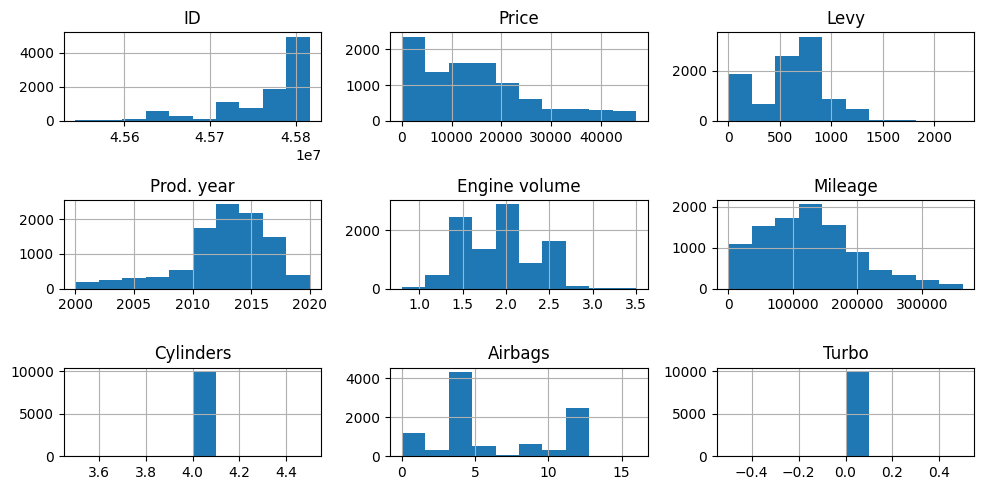

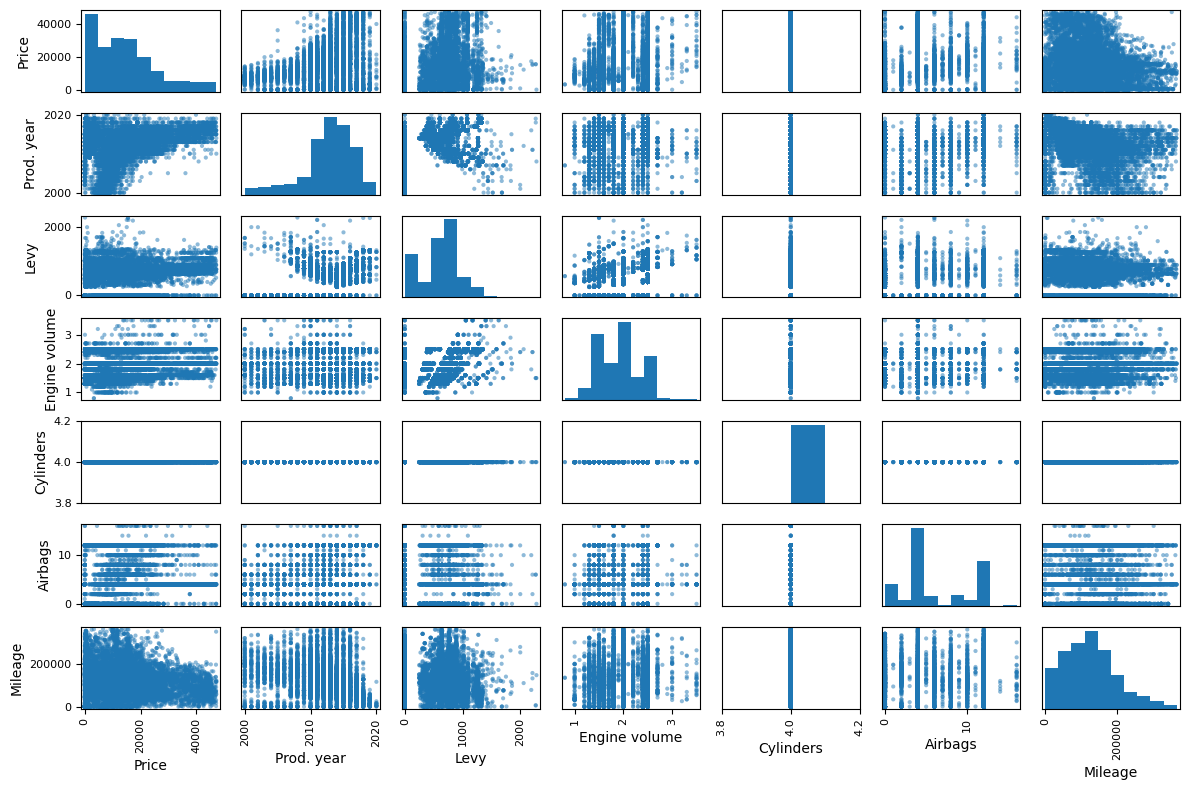

In [14]:
data_no_outliers.hist(figsize=(10,5)) #bins: no. of intervals
plt.tight_layout()

from pandas.plotting import scatter_matrix
def scatter(raw_data):
	attributes = ['Price', 'Prod. year', 'Levy', 'Engine volume', 'Cylinders', 'Airbags', 'Mileage'	]
	scatter_matrix(data_no_outliers[attributes], figsize=(12, 8))
	plt.tight_layout()
	plt.show()
scatter(data_no_outliers)

                     ID     Price      Levy  Prod. year  Engine volume  \
ID             1.000000  0.133719  0.038659   -0.039705      -0.075034   
Price          0.133719  1.000000  0.126190    0.283657       0.092717   
Levy           0.038659  0.126190  1.000000    0.438808       0.355341   
Prod. year    -0.039705  0.283657  0.438808    1.000000       0.140748   
Engine volume -0.075034  0.092717  0.355341    0.140748       1.000000   
Mileage       -0.073991 -0.176779 -0.118021   -0.259068       0.067728   
Cylinders           NaN       NaN       NaN         NaN            NaN   
Airbags       -0.038475 -0.201407  0.072382    0.205945       0.212645   
Turbo               NaN       NaN       NaN         NaN            NaN   

                Mileage  Cylinders   Airbags  Turbo  
ID            -0.073991        NaN -0.038475    NaN  
Price         -0.176779        NaN -0.201407    NaN  
Levy          -0.118021        NaN  0.072382    NaN  
Prod. year    -0.259068        NaN  0.20594

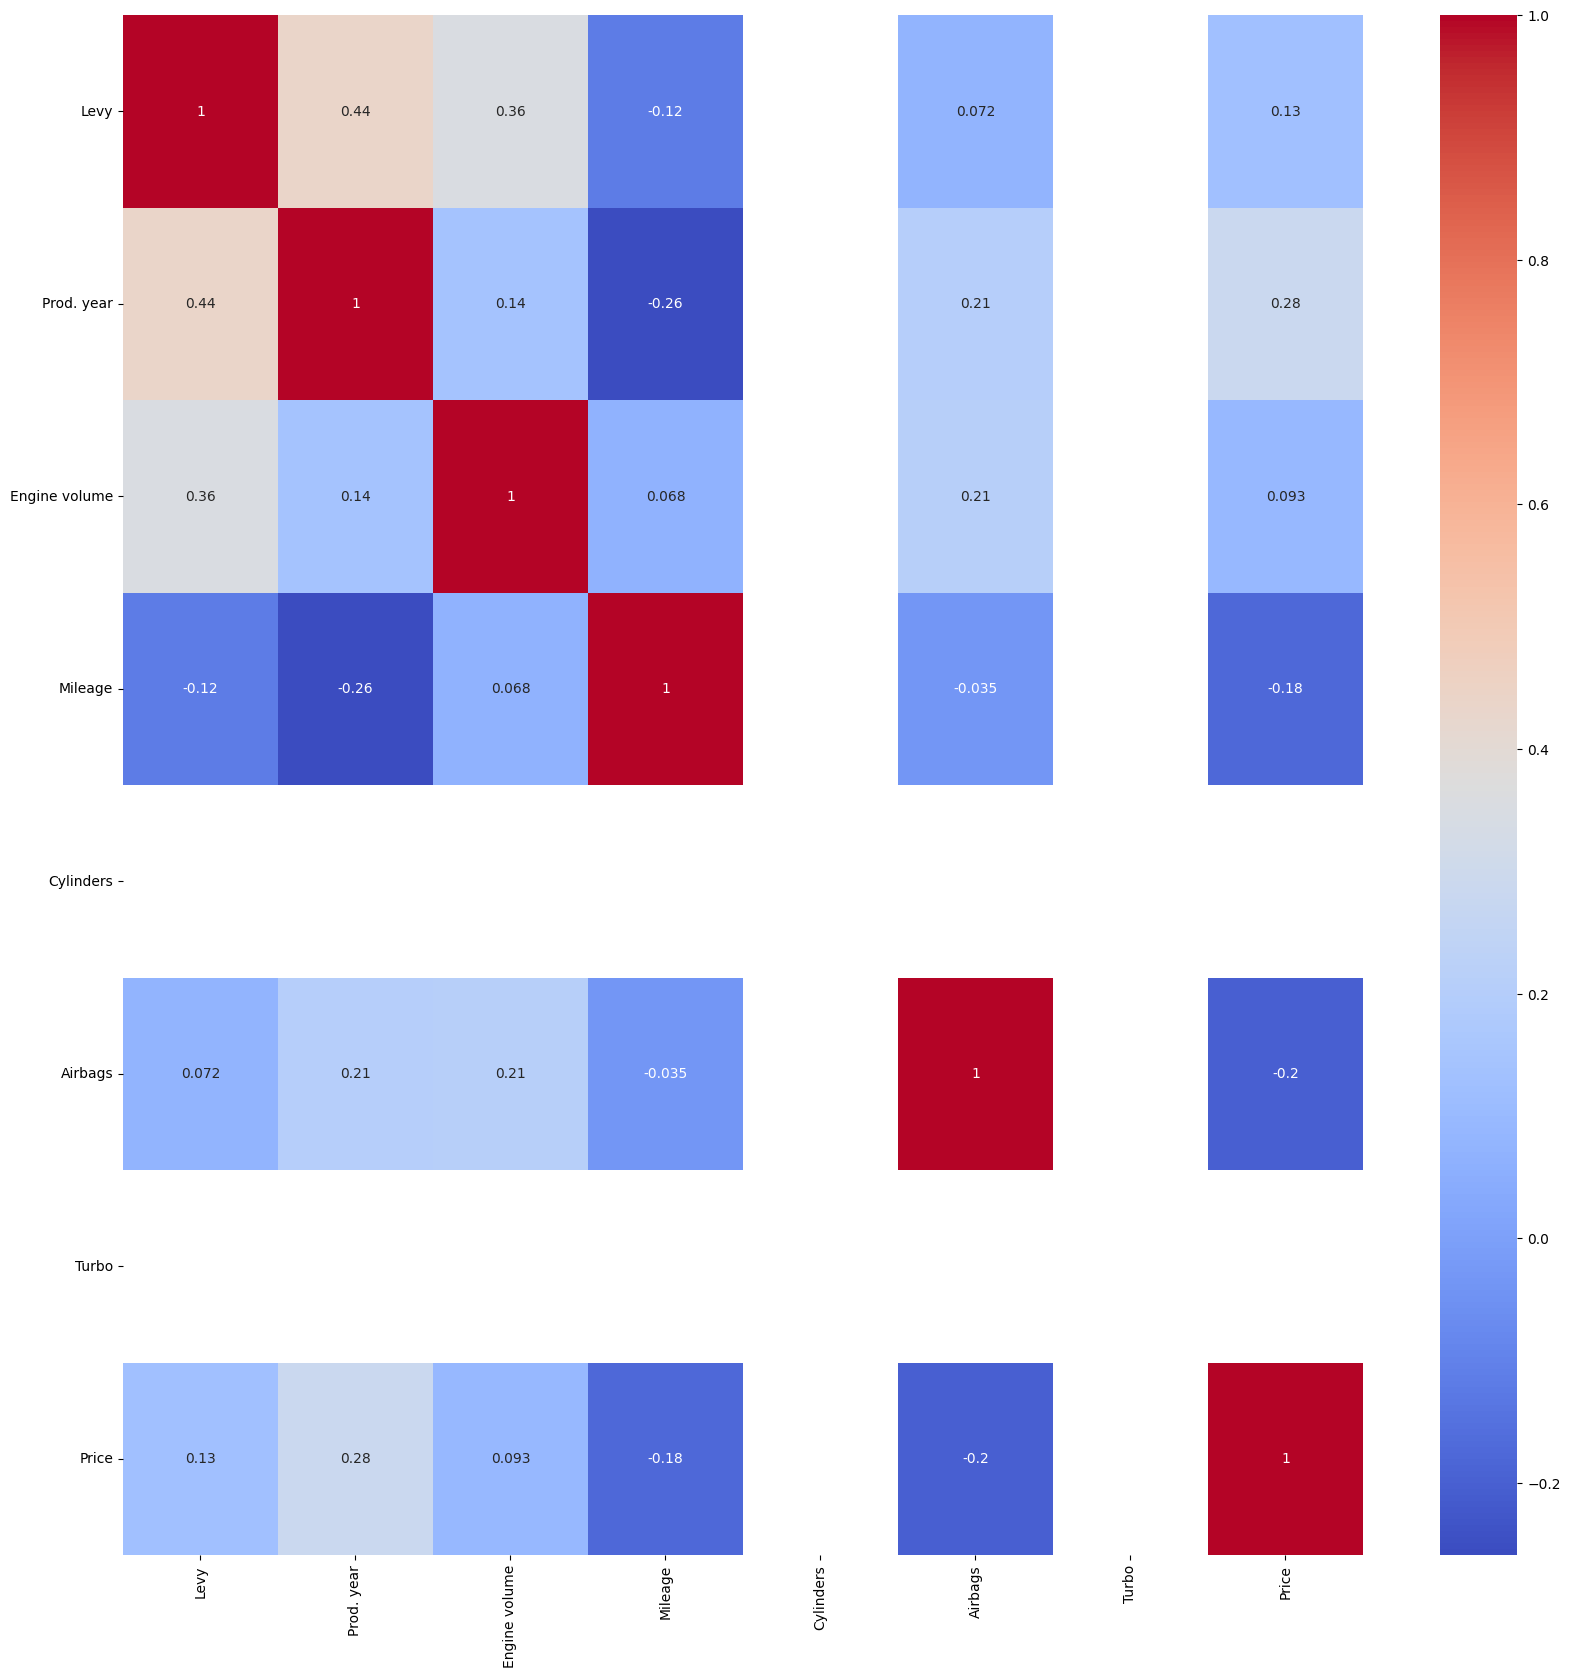

In [15]:
# 3.4 Correlation matrix
data_no_outliers.drop(columns = ["ID"])

corr_matrix = data_no_outliers.corr(numeric_only=True)
print(corr_matrix) # print correlation matrix
print('\n',corr_matrix["Price"].sort_values(ascending=False)) # print correlation b/w a feature and other features

columns = list(corr_matrix.columns)
columns.remove('ID')

columns.remove('Price')
columns.append('Price')
corr_matrix = corr_matrix.loc[columns, columns]

# Create a heatmap from the correlation matrix
plt. figure(figsize=(20, 20))
sns. heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=90, fontsize=10)
# Rotate y-axis labels
plt.yticks(rotation=0, fontsize=10)
plt.show()

In [ ]:
data_no_outliers.describe()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Turbo
count,9.897000e+03,9897.000000,9897.000000,9897.000000,9897.000000,9897.000000,9897.0,9897.000000,9897.0
mean,4.576630e+07,14676.102758,608.015358,2012.241891,1.945074,124839.244923,4.0,6.065070,0.0
std,5.477813e+04,11600.772000,363.363598,3.841795,0.394972,74000.968786,0.0,4.102099,0.0
min,4.554293e+07,1.000000,0.000000,2000.000000,0.800000,0.000000,4.0,0.000000,0.0
25%,4.574894e+07,5175.000000,431.000000,2011.000000,1.600000,70400.000000,4.0,4.000000,0.0
50%,4.578925e+07,13172.000000,642.000000,2013.000000,2.000000,119150.000000,4.0,4.000000,0.0
75%,4.580376e+07,20698.000000,831.000000,2015.000000,2.400000,168341.000000,4.0,12.000000,0.0
max,4.581665e+07,47120.000000,2278.000000,2020.000000,3.500000,363661.000000,4.0,16.000000,0.0


In [16]:
# 4.2 Split training - test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_no_outliers, test_size=0.2, random_state=42) # set random_state to get the same training set all the time, 
																					# otherwise, when repeating training many times, your model may see all the data
print('\n____________ Split training and test set ____________')     
print(len(train_set), "training +", len(test_set), "test examples")
print(test_set.head(4))


____________ Split training and test set ____________
7917 training + 1980 test examples
             ID  Price  Levy Manufacturer    Model  Prod. year Category  \
16282  45810272  25744   765    CHEVROLET   Malibu        2015    Sedan   
7877   45804477  24123   642      HYUNDAI   Tucson        2012     Jeep   
5413   45772059    549  1481         FORD    Focus        2006    Sedan   
9350   45793881   7213  1286    CHEVROLET  Captiva        2007     Jeep   

      Leather interior Fuel type  Engine volume  Mileage  Cylinders  \
16282              Yes    Diesel            2.0   111365        4.0   
7877               Yes    Diesel            2.0   182000        4.0   
5413               Yes    Petrol            2.0   240746        4.0   
9350               Yes    Diesel            2.0    56327        4.0   

      Gear box type Drive wheels   Doors       Wheel  Color  Airbags  Turbo  
16282     Automatic        Front  04-May  Left wheel   Grey        4      0  
7877      Automatic   

In [17]:
#%% 4.3 Separate labels from data, since we do not process label values
train_set_labels = train_set["Price"].copy()
train_set = train_set.drop(columns = "Price") 
test_set_labels = test_set["Price"].copy()
test_set = test_set.drop(columns = "Price") 


In [18]:
# 4.4 Define pipelines for processing data. 
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names
    def fit(self, dataframe, labels=None):
        return self
    def transform(self, dataframe):
        return dataframe[self.feature_names].values         

# categorical pipelines
cat_pipeline = Pipeline([
    ('selector', ColumnSelector(cat_cols)),
    ('imputer', SimpleImputer(missing_values="-", strategy="constant", fill_value = "NO INFO", copy=True)), # complete missing values. copy=False: imputation will be done in-place 
    ('cat_encoder', OneHotEncoder()) # convert categorical data into one-hot vectors
    ])    

# # 4.4.3 Define MyFeatureAdder: a transformer for adding features "TOTAL NUMBER OF BEDROOMS",...  
# class MyFeatureAdder(BaseEstimator, TransformerMixin):
#     def __init__(self, add_TOTAL_NO_OF_ROOMS = True): # MUST NO *args or **kargs
#         self.add_TOTAL_NO_OF_ROOMS = add_TOTAL_NO_OF_ROOMS
#     def fit(self, feature_values, labels = None):
#         return self  # nothing to do here
#     def transform(self, feature_values, labels = None):
#         if self.add_TOTAL_NO_OF_ROOMS:        
#             NO_OF_ROOMS_id, NO_OF_TOILETS_id = 1, 2 # column indices in num_feat_names. can't use column names b/c the transformer SimpleImputer removed them
#             # NOTE: a transformer in a pipeline ALWAYS return dataframe.values (ie., NO header and row index)
            
#             TOTAL_NO_OF_ROOMS = feature_values[:, NO_OF_ROOMS_id] + feature_values[:, NO_OF_TOILETS_id]
#             feature_values = np.c_[feature_values, TOTAL_NO_OF_ROOMS] #concatenate np arrays
#         return feature_values

# 4.4.4 Pipeline for numerical features
num_pipeline = Pipeline([
    ('selector', ColumnSelector(num_cols)),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy="median", copy=True)), # copy=False: imputation will be done in-place 
    # ('attribs_adder', MyFeatureAdder(add_TOTAL_NO_OF_ROOMS = True)),
    ('std_scaler', StandardScaler(with_mean=True, with_std=True, copy=True)) # Scale features to zero mean and unit variance
    ])  

  
# 4.4.5 Combine features transformed by two above pipelines
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline) ])  


# # 4.5 Run the pipeline to process training data           
processed_train_set_val = full_pipeline.fit_transform(train_set)
print('\n____________ Processed feature values ____________')
print(processed_train_set_val[[0, 1, 2],:].toarray())
print(processed_train_set_val.shape)
print('We have %d numeric feature + 1 added features + 35 cols of onehotvector for categorical features.' %(len(num_cols)))
joblib.dump(full_pipeline, r'models/full_pipeline.pkl')



KeyError: "['Price'] not in index"

In [ ]:
# # (optional) Add header to create dataframe. Just to see. We don't need header to run algorithms 
# onehot_cols = []
# for val_list in full_pipeline.transformer_list[1][1].named_steps['cat_encoder'].categories_: 
# 	onehot_cols = onehot_cols + val_list.tolist()
# columns_header = train_set.columns.tolist() + ["TOTAL NUMBER OF BEDROOMS"] + onehot_cols
# for name in cat_feat_names:
# 	columns_header.remove(name)
# processed_train_set = pd.DataFrame(processed_train_set_val.toarray(), columns = columns_header)
# print('\n____________ Processed dataframe ____________')
# print(processed_train_set.info())
# print(processed_train_set.head())


## Training Models

### Helper function

In [19]:

def r2score_and_rmse(model, train_data, labels):
    r2score = model.score(train_data, labels)
    from sklearn.metrics import mean_squared_error
    prediction = model.predict(train_data)
    mse = mean_squared_error(labels, prediction)
    rmse = np.sqrt(mse)
    return r2score, rmse


def store_model(model, model_name=""):
    # NOTE: sklearn.joblib faster than pickle of Python
    # INFO: can store only ONE object in a file
    if model_name == "":
        model_name = type(model).__name__
    joblib.dump(model, 'models/' + model_name + '_model.pkl')


def load_model(model_name):
    model = joblib.load('models/' + model_name + '_model.pkl')

    return model

### Decision Trees Model

In [23]:
# DECISION TREE REGRESSOR MODEL TRAINING
new_training = 1

if new_training:
    model = DecisionTreeRegressor()
    model.fit(processed_train_set_val, train_set_labels)

    r2score, rmse = r2score_and_rmse(
        model, processed_train_set_val, test_set_labels)
    store_model(model, "DecisionTreeRegressor")
else:
    model = load_model('DecisionTreeRegressor')

# Analyze performance
print('\______________DECISION_TREE_REGRESSION PERFORMACE_________')
print('\n R2 Score:', r2score)
print('\n RMSE:', rmse)

# store the model for later use
store_model(model)

print("\nPredictions: ", model.predict(
    processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))

NameError: name 'processed_train_set_val' is not defined

### Random Forest Regressor model

In [ ]:
new_training = 1

if new_training: 
    model = RandomForestRegressor()
    model.fit(processed_train_set_val, train_set_labels)

    r2score, rmse =r2score_and_rmse(model, processed_train_set_val, test_set_labels)
    store_model = store_model(model, "RandomForestRegressor")
else:
    model = load_model("RandomForestRegressor")


print('\_____________RANDOM_FOREST_REGRESSOR PERFORMACE_________')
print('\n R2 Score:', r2score)
print('\n RMSE:', rmse)

#store the model for later use
store_model(model)

print("\nPredictions: ", model.predict(
    processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))



### Ridge model

In [ ]:
new_training = 1
if new_training:
  model = Ridge(alpha=0.1)
  model.fit(processed_train_set_val, train_set_labels)
  store_model(model, model_name="RidgeRegression")
else:
  model = load_model("RidgeRegression")

r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)

print('_______SCORE FOR RIDGE REGRESSION_________')
print('\nR2 score: ', r2score) 
print('RMSE score: ', rmse)

print("\nPredictions: ", model.predict(
    processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))
# Ridge Regression
